In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json

# Load datasets
graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
# P_N = students_data['P_N']  # Liczba studentów
P_N = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu
P_N_SEMESTR = graduates_data['P_N_SEMESTR'] # Liczba semestrów
P_NAZWA_UCZELNI = graduates_data['P_NAZWA_UCZELNI'] # Nazwa uczelni

# Convert selected columns with numeric strings to float
for col in graduates_data.columns:
    if any(keyword in col for keyword in ['P_ME', 'P_WWZ', 'P_WWB', 'P_CZAS']):
        graduates_data[col] = graduates_data[col].astype(str).str.replace(',', '.')
        graduates_data[col] = pd.to_numeric(graduates_data[col], errors='coerce')


/tmp/ipykernel_24360/4222050872.py:9: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_24360/4222050872.py:10: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memor

In [10]:
# Function to map a field to a category based on keywords
def add_field_column(dataframe, column_name):
    """
    Add a new column 'Dziedzina' to the given DataFrame based on keywords in the specified column.
    
    Args:
        dataframe (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column containing course names.

    Returns:
        pd.DataFrame: The updated DataFrame with the new 'Dziedzina' column.
    """
    # Dictionary mapping phrases to fields
    keywords_to_dziedzina = {
        "Prawo": "Nauki prawne",
        "Psychol": "Psychologia",
        "Automat": "Automatyka",
        "Informat": "Informatyka",
        "Zarządzanie": "Zarządzanie",
        "lekarski": "Kierunek lekarski",
        "Ekonom": "Ekonomia",
        "Mechani": "Inżynieria mechaniczna",
        "Chem": "Chemia",
        "Budowni": "Inżynieria lądowa",
        "Archit": "Architektura",
        "Elektr": "Inżynieria elektryczna",
        "środowi": "Inżynieria środowiskowa",
    }
    
    # Function to assign a field based on keywords
    def assign_field(course_name):
        for keyword, field in keywords_to_dziedzina.items():
            if keyword.lower() in course_name.lower():  # Check if keyword exists in the course name
                return field
        return "Inne"  # Assign "Inne" if no match is found

    # Apply the function to create the new column
    dataframe['Dziedzina'] = dataframe[column_name].apply(assign_field)

    return dataframe

# Apply the function to the graduates_data DataFrame
graduates_data = add_field_column(graduates_data, 'P_KIERUNEK_NAZWA')

In [11]:
def add_adjusted_salary_column(data, median_dict):
    """
    Adds a column to the graduates_data DataFrame where the value is P_ME_ZAR_P2 
    divided by the median salary based on the year in P_ROKDYP.

    Args:
        data (pd.DataFrame): The graduates_data DataFrame.
        median_dict (dict): A dictionary containing median salaries for specific years.

    Returns:
        pd.DataFrame: The updated DataFrame with the new column.
    """
    def calculate_adjusted_salary(row):
        year = row['P_ROKDYP']
        if year in median_dict:
            return row['P_ME_ZAR_P2'] / median_dict[year + 2]
        return None  # Return None if the year is not in the median dictionary

    # Add the new column to the DataFrame
    data['P_WWZ_P2'] = data.apply(calculate_adjusted_salary, axis=1)

    return data

# Define the median dictionary
median = {
2014: 3291.56,
2015: 3401.11,
2016: 3510.67,
2017: 3802.82,
2018: 4094.98,
2019: 4398.82,
2020: 4702.66,
2021: 5202.14,
2022: 5701.62,
2023: 6100.81,
2024: 6500.00
}

# Add the new column to graduates_data
graduates_data = add_adjusted_salary_column(graduates_data, median)

In [12]:
# Create a dictionary to store mappings for each column
label_mappings = {}

# Encode variables and save mappings
for column in ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']:
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform the column
    graduates_data[column] = label_encoder.fit_transform(graduates_data[column])
    
    # Store the mapping: original value -> encoded value
    label_mappings[column] = {str(original): encoded for encoded, original in enumerate(label_encoder.classes_)}

# # Save mappings to a file (optional)
# import json
with open('label_mappings.json', 'w', encoding='utf-8') as f:
    json.dump(label_mappings, f, ensure_ascii=False, indent=4)

# Print the mappings
for column, mapping in label_mappings.items():
    print(f"Mapping for {column}:")
    for original, encoded in mapping.items():
        print(f"  {original}: {encoded}")

Mapping for P_WOJ:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7
  8: 8
  9: 9
  10: 10
  11: 11
  12: 12
  13: 13
  14: 14
  15: 15
  16: 16
Mapping for P_POZIOM:
  0: 0
  1: 1
  2: 2
Mapping for P_FORMA:
  0: 0
  1: 1
Mapping for Dziedzina:
  Architektura: 0
  Automatyka: 1
  Chemia: 2
  Ekonomia: 3
  Informatyka: 4
  Inne: 5
  Inżynieria elektryczna: 6
  Inżynieria lądowa: 7
  Inżynieria mechaniczna: 8
  Inżynieria środowiskowa: 9
  Kierunek lekarski: 10
  Nauki prawne: 11
  Psychologia: 12
  Zarządzanie: 13


In [13]:
import json

# Path to the .json file
file_path = 'label_mappings.json'

# Load the .json file
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Now `data` is a regular Python dictionary
print(type(data))  # <class 'dict'>
print(data)

# Function to find a key based on a value
def get_key_from_value(mapping, value):
    reverse_mapping = {v: k for k, v in mapping.items()}
    return reverse_mapping.get(value, "Value not found")

# Example usage
value_to_find = 0
result = get_key_from_value(data['P_FORMA'], value_to_find)
print(result)

<class 'dict'>
{'P_WOJ': {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16}, 'P_POZIOM': {'0': 0, '1': 1, '2': 2}, 'P_FORMA': {'0': 0, '1': 1}, 'Dziedzina': {'Architektura': 0, 'Automatyka': 1, 'Chemia': 2, 'Ekonomia': 3, 'Informatyka': 4, 'Inne': 5, 'Inżynieria elektryczna': 6, 'Inżynieria lądowa': 7, 'Inżynieria mechaniczna': 8, 'Inżynieria środowiskowa': 9, 'Kierunek lekarski': 10, 'Nauki prawne': 11, 'Psychologia': 12, 'Zarządzanie': 13}}
0


In [45]:
graduates_data_before = graduates_data.copy()
graduates_data_after = graduates_data.copy()

years_before = [2014, 2016, 2018, 2020, 2022]
graduates_data_before = graduates_data_before[graduates_data_before['P_ROKDYP'].isin(years_before)]

Architektura


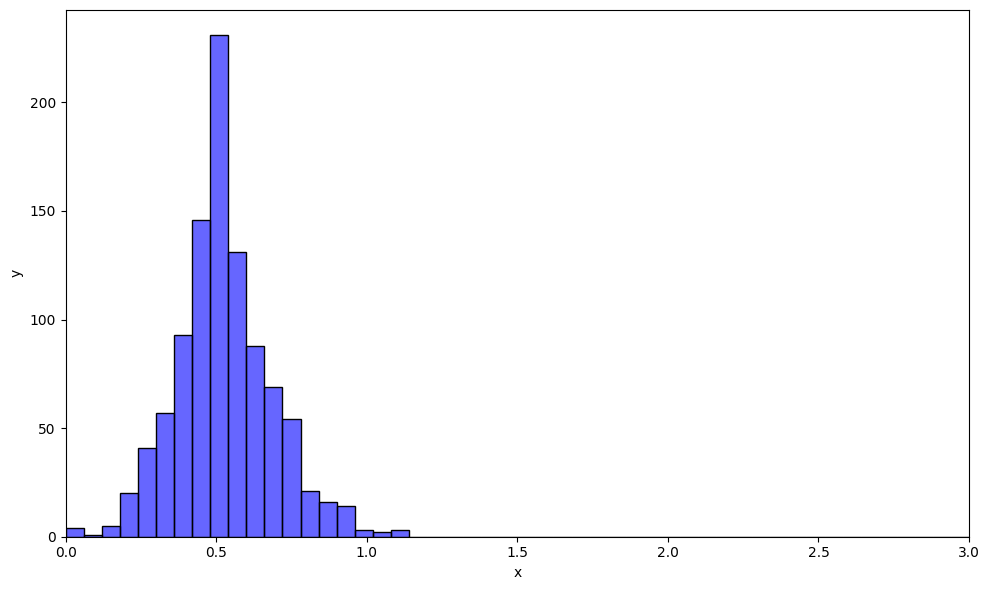

Automatyka


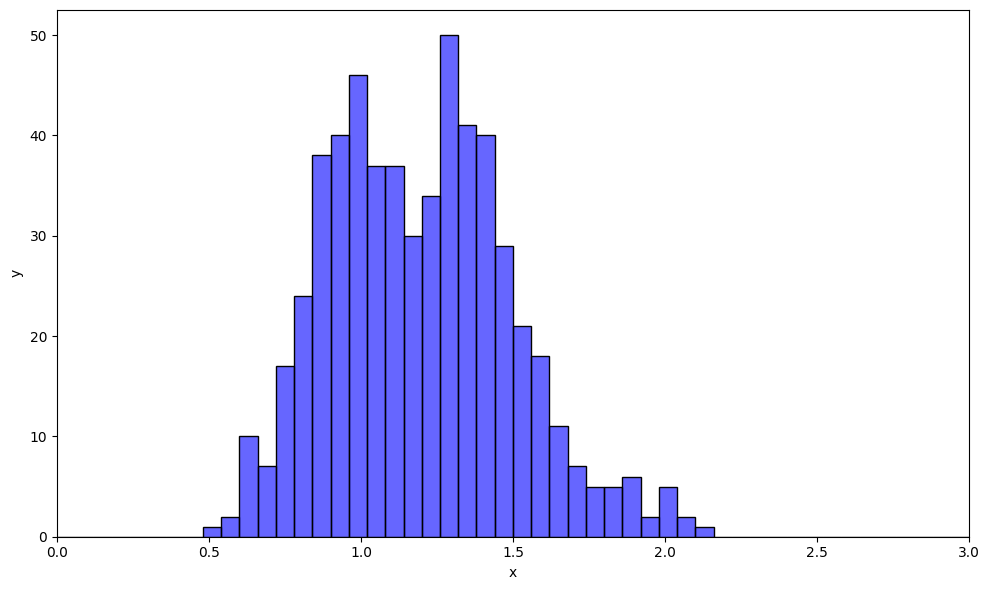

Chemia


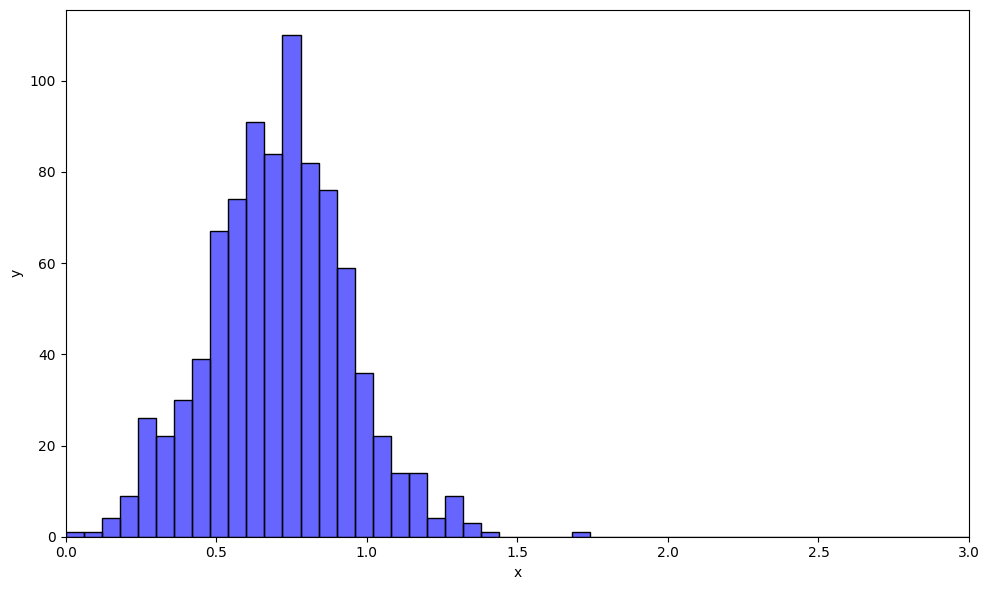

Ekonomia


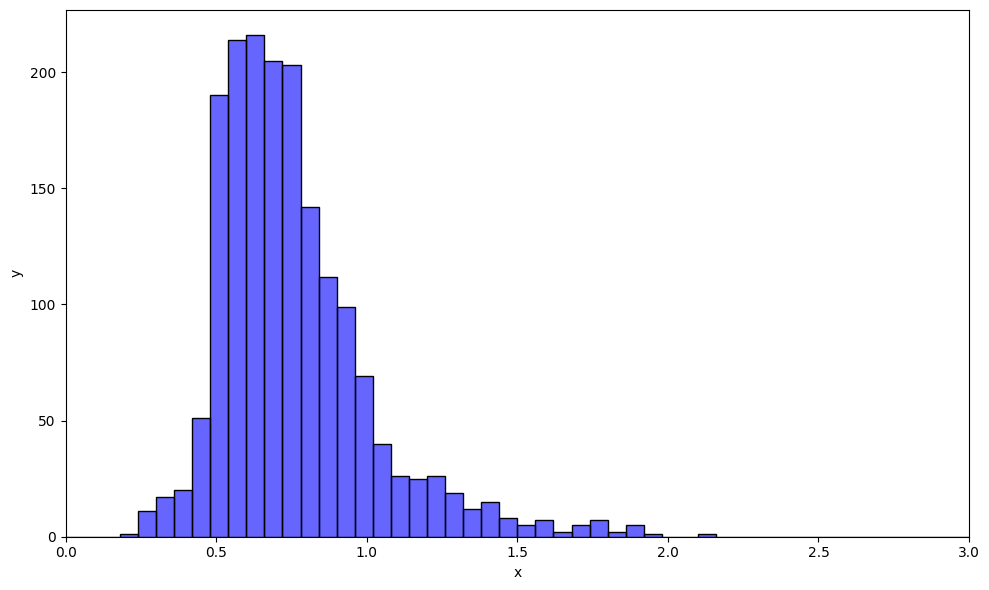

Informatyka


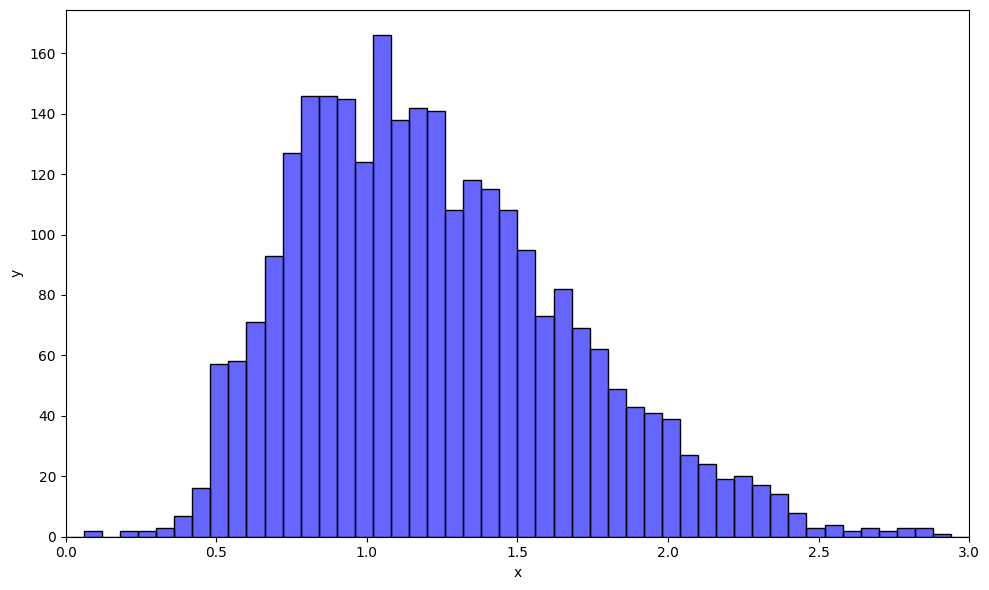

Inne


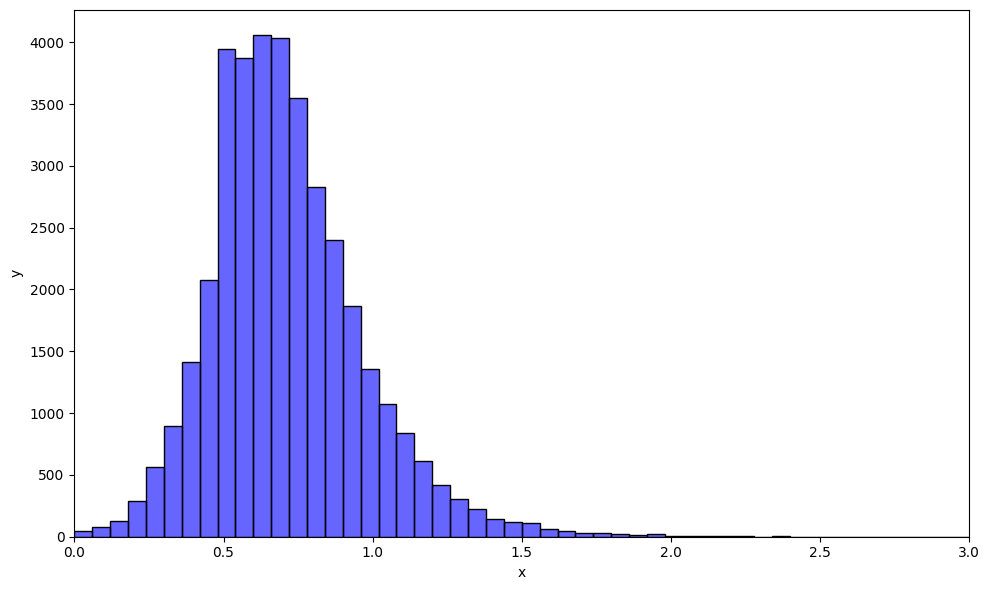

Inżynieria elektryczna


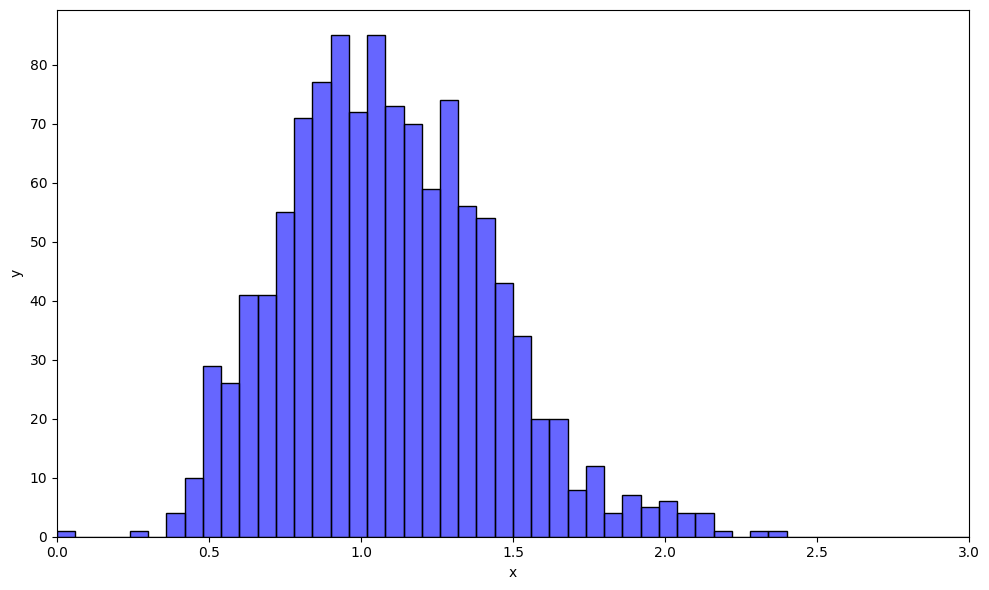

Inżynieria lądowa


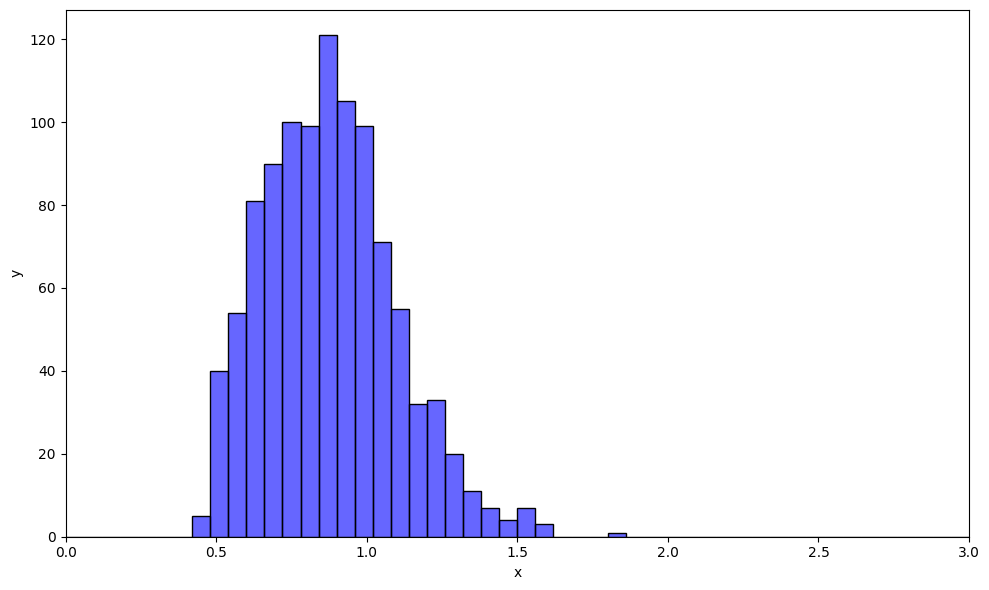

Inżynieria mechaniczna


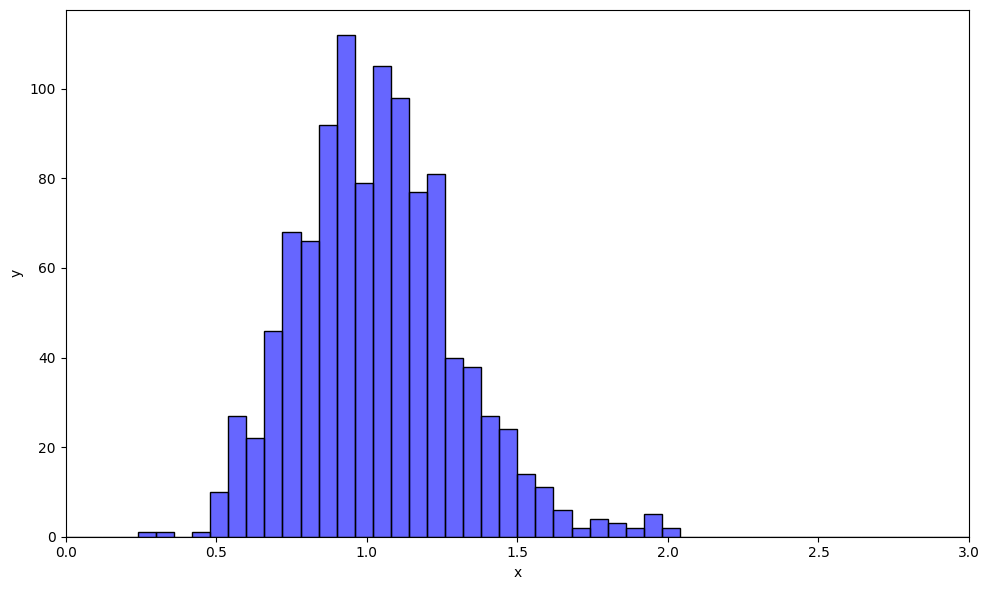

Inżynieria środowiskowa


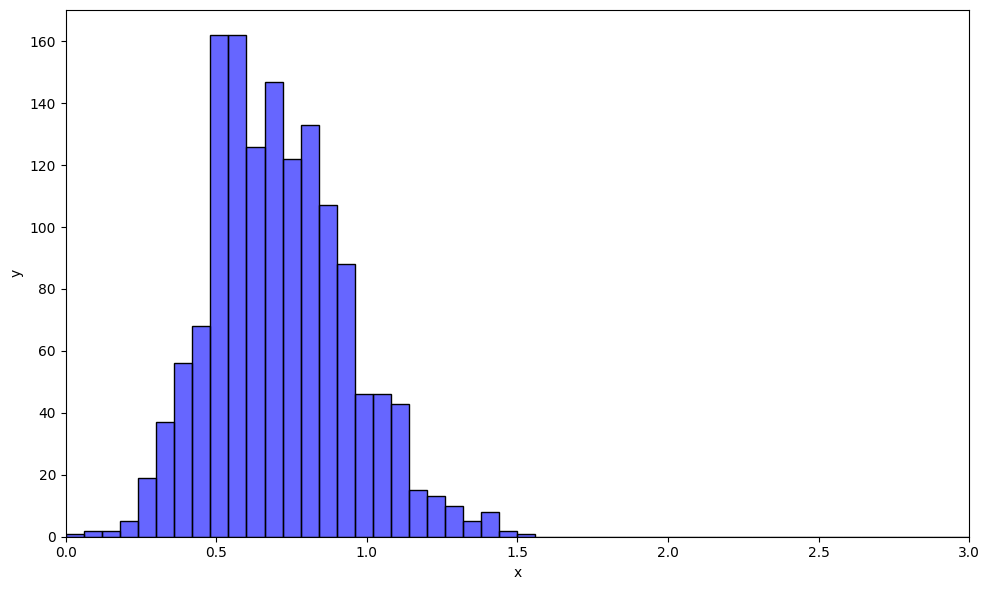

Kierunek lekarski


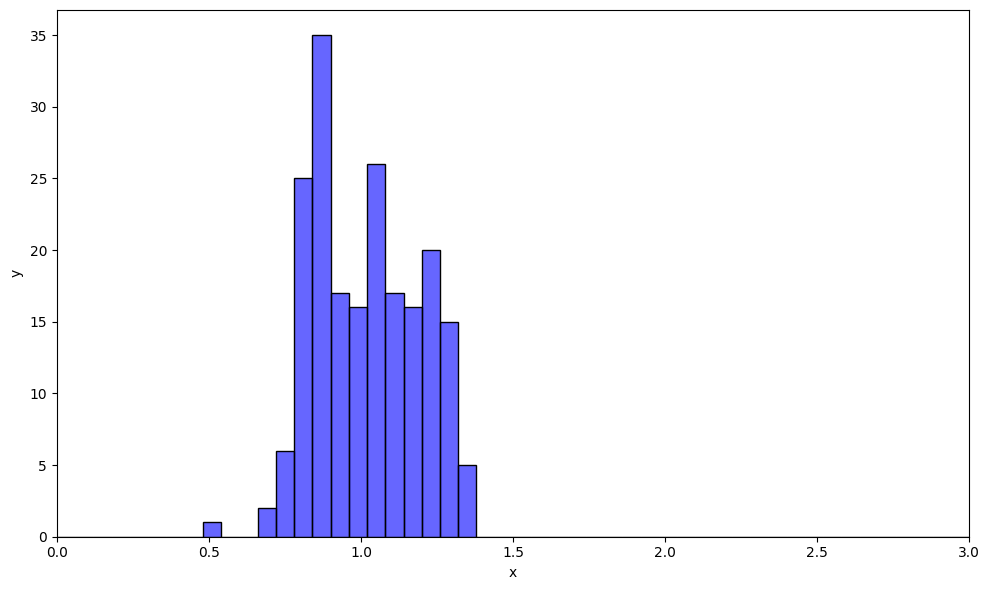

Nauki prawne


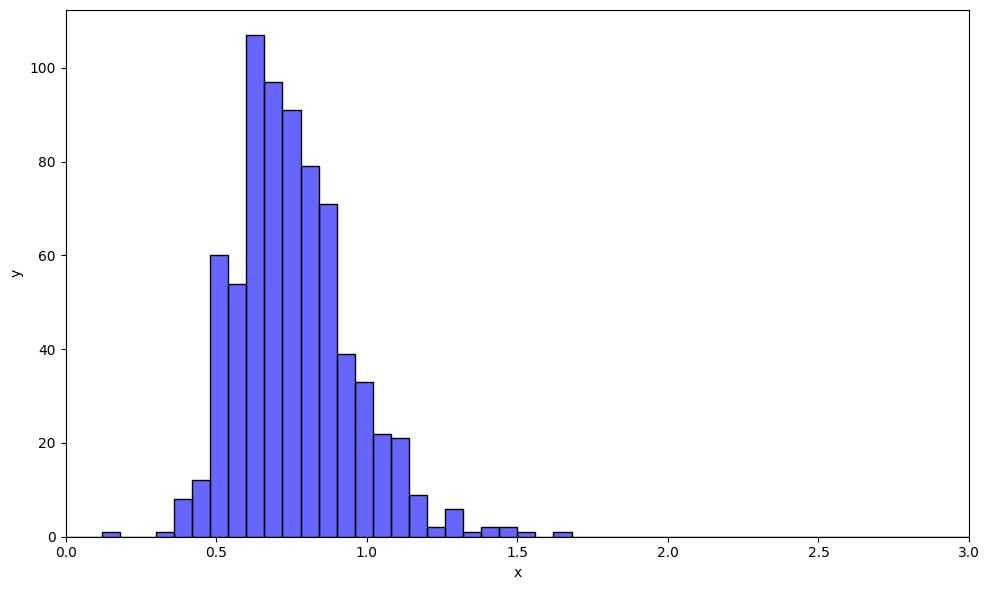

Psychologia


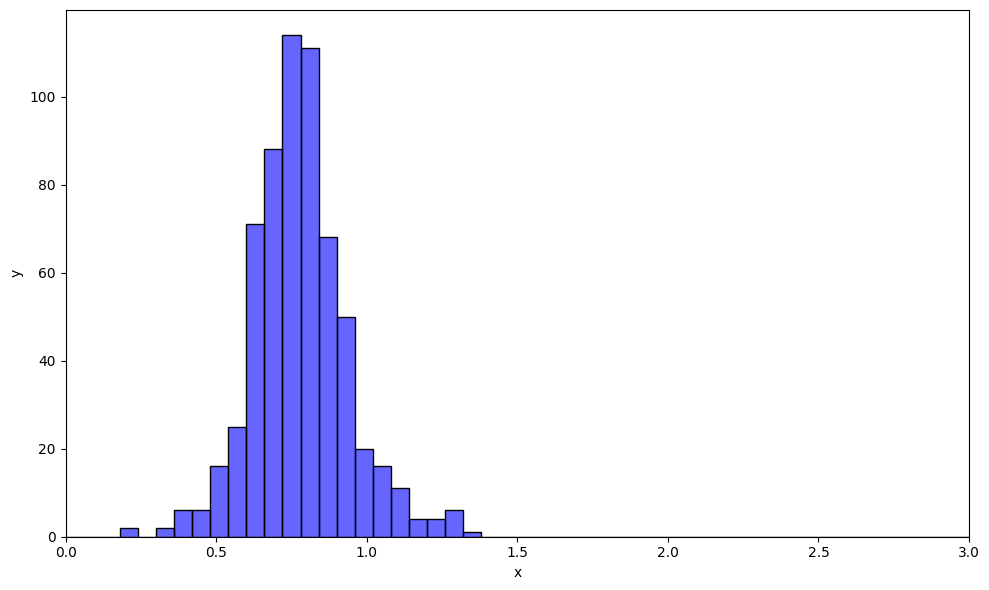

In [15]:
num_bins = 50
x_range = (0, 3)

temp_data = graduates_data[['P_N', 'P_ME_ZAR_P2', 'Dziedzina', 'P_WWZ_P2', 'P_FORMA']].copy()

for i in (range(0,13)):    
    print(get_key_from_value(data['Dziedzina'], i))
    temp_data = graduates_data[['P_N', 'P_ME_ZAR_P2', 'Dziedzina', 'P_WWZ_P2', 'P_FORMA']].copy()
    temp_data = temp_data[temp_data['Dziedzina'] == i]

    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=temp_data, 
        x='P_WWZ_P2', 
        # weights='P_N', 
        bins=num_bins, 
        binrange=x_range, 
        kde=False, 
        color='blue',
        edgecolor="black", 
        alpha=0.6, 
        stat="count"
    )
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(x_range)
    plt.tight_layout()
    plt.show()
# sns.lineplot(data=temp_data, x=i, y=f'P_WWZ_MIES_{i}')
# sns.scatterplot(data=temp_data, x=i, y=f'P_WWZ_MIES_{i}')

# plt.title('Test')


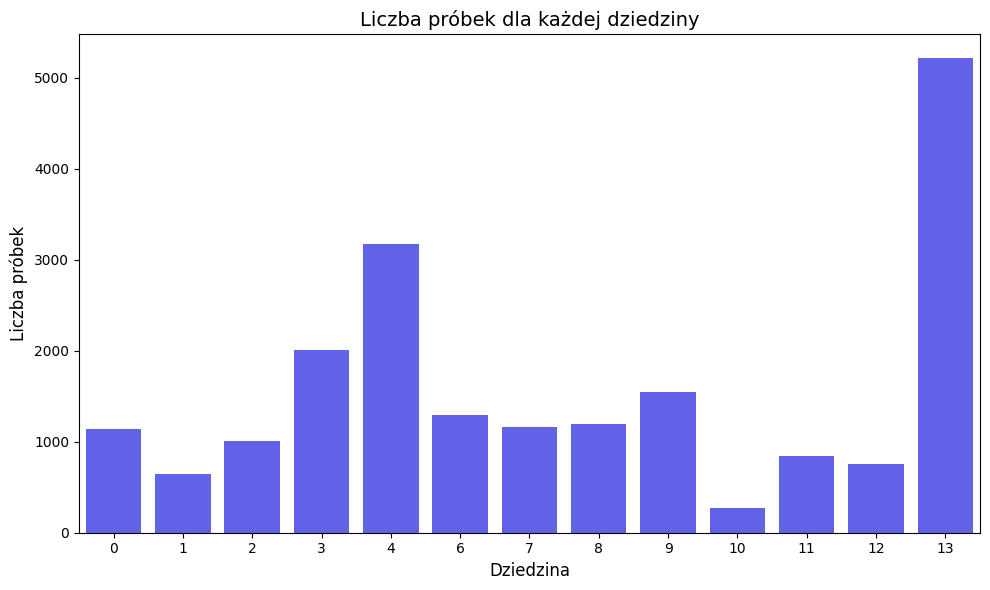

Informatyka


In [16]:
temp_data = graduates_data[['Dziedzina']].copy()

temp_data = temp_data[temp_data['Dziedzina'] != 5]

# Grupowanie danych po kolumnie 'Dziedzina' i liczenie próbek
sample_counts = temp_data.groupby('Dziedzina').size()

# Tworzenie wykresu kolumnowego
plt.figure(figsize=(10, 6))
sns.barplot(x=sample_counts.index, y=sample_counts.values, color='blue', alpha=0.7)

# Dodanie tytułów i etykiet
plt.title('Liczba próbek dla każdej dziedziny', fontsize=14)
plt.xlabel('Dziedzina', fontsize=12)
plt.ylabel('Liczba próbek', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

print(get_key_from_value(data['Dziedzina'], 4))

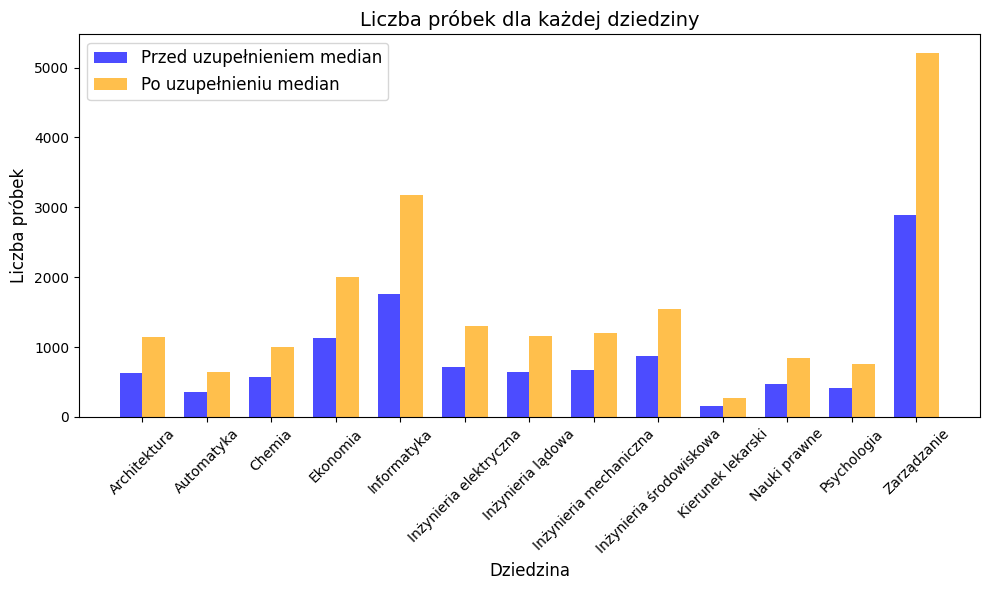

Liczba wszystkich próbek BEFORE: 11248
Liczba wszystkich próbek AFTER: 20248


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Słownik mapowania
mapping_dict = {
    "Architektura": 0,
    "Automatyka": 1,
    "Chemia": 2,
    "Ekonomia": 3,
    "Informatyka": 4,
    "Inne": 5,
    "Inżynieria elektryczna": 6,
    "Inżynieria lądowa": 7,
    "Inżynieria mechaniczna": 8,
    "Inżynieria środowiskowa": 9,
    "Kierunek lekarski": 10,
    "Nauki prawne": 11,
    "Psychologia": 12,
    "Zarządzanie": 13
}
# Odwrócenie słownika (dla mapowania numerów na nazwy)
reverse_mapping = {v: k for k, v in mapping_dict.items()}

# Przygotowanie danych przed
temp_data_before = graduates_data_before[['Dziedzina']].copy()
temp_data_before = temp_data_before[temp_data_before['Dziedzina'] != 5]

# Przygotowanie danych po
temp_data_after = graduates_data_after[['Dziedzina']].copy()
temp_data_after = temp_data_after[temp_data_after['Dziedzina'] != 5]

# Grupowanie danych po kolumnie 'Dziedzina' i liczenie próbek
sample_counts_before = temp_data_before['Dziedzina'].value_counts().sort_index()
sample_counts_after = temp_data_after['Dziedzina'].value_counts().sort_index()

# Dopasowanie indeksów, aby obie serie miały te same dziedziny
all_categories = sorted(set(sample_counts_before.index).union(set(sample_counts_after.index)))
sample_counts_before = sample_counts_before.reindex(all_categories, fill_value=0)
sample_counts_after = sample_counts_after.reindex(all_categories, fill_value=0)

# Zmapowanie numerów na nazwy dziedzin
categories_names = [reverse_mapping[cat] for cat in all_categories]

# Ustawienia wykresu
bar_width = 0.35  # Szerokość kolumn
x = np.arange(len(all_categories))  # Pozycje na osi X

plt.figure(figsize=(10, 6))

# Wykres dla danych before
plt.bar(x - bar_width / 2, sample_counts_before, width=bar_width, label='Przed uzupełnieniem median', color='blue', alpha=0.7)

# Wykres dla danych after
plt.bar(x + bar_width / 2, sample_counts_after, width=bar_width, label='Po uzupełnieniu median', color='orange', alpha=0.7)

# Dodanie tytułów i etykiet
plt.title('Liczba próbek dla każdej dziedziny', fontsize=14)
plt.xlabel('Dziedzina', fontsize=12)
plt.ylabel('Liczba próbek', fontsize=12)
plt.xticks(ticks=x, labels=categories_names, fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

# Liczba wszystkich próbek dla 'before'
total_samples_before = len(temp_data_before)

# Liczba wszystkich próbek dla 'after'
total_samples_after = len(temp_data_after)

print(f"Liczba wszystkich próbek BEFORE: {total_samples_before}")
print(f"Liczba wszystkich próbek AFTER: {total_samples_after}")

Epoch 1/50, Loss: 48.6689
Epoch 2/50, Loss: 21.6893
Epoch 3/50, Loss: 21.3809
Epoch 4/50, Loss: 21.0965
Epoch 5/50, Loss: 20.9460
Epoch 6/50, Loss: 21.0279
Epoch 7/50, Loss: 20.9248
Epoch 8/50, Loss: 20.6947
Epoch 9/50, Loss: 20.9190
Epoch 10/50, Loss: 20.5188
Epoch 11/50, Loss: 20.7013
Epoch 12/50, Loss: 20.5423
Epoch 13/50, Loss: 20.6021
Epoch 14/50, Loss: 20.5402
Epoch 15/50, Loss: 20.5879
Epoch 16/50, Loss: 20.4701
Epoch 17/50, Loss: 20.4579
Epoch 18/50, Loss: 20.3185
Epoch 19/50, Loss: 20.5577
Epoch 20/50, Loss: 20.3228
Epoch 21/50, Loss: 20.3811
Epoch 22/50, Loss: 20.3821
Epoch 23/50, Loss: 20.3860
Epoch 24/50, Loss: 20.4782
Epoch 25/50, Loss: 20.2423
Epoch 26/50, Loss: 20.2634
Epoch 27/50, Loss: 20.3771
Epoch 28/50, Loss: 20.3596
Epoch 29/50, Loss: 20.2923
Epoch 30/50, Loss: 20.2668
Epoch 31/50, Loss: 20.1969
Epoch 32/50, Loss: 20.1179
Epoch 33/50, Loss: 20.2074
Epoch 34/50, Loss: 20.1356
Epoch 35/50, Loss: 20.2048
Epoch 36/50, Loss: 20.1508
Epoch 37/50, Loss: 20.1397
Epoch 38/5

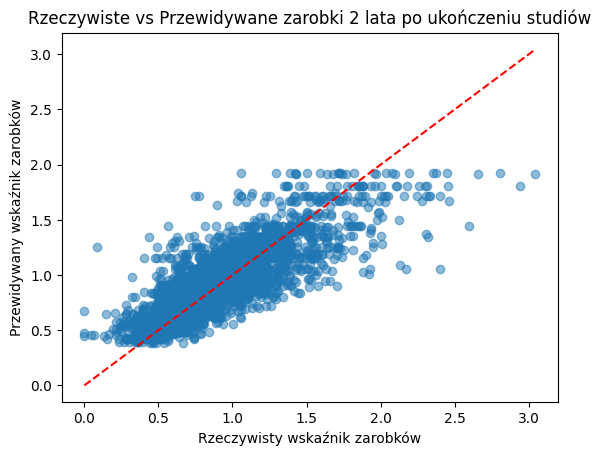

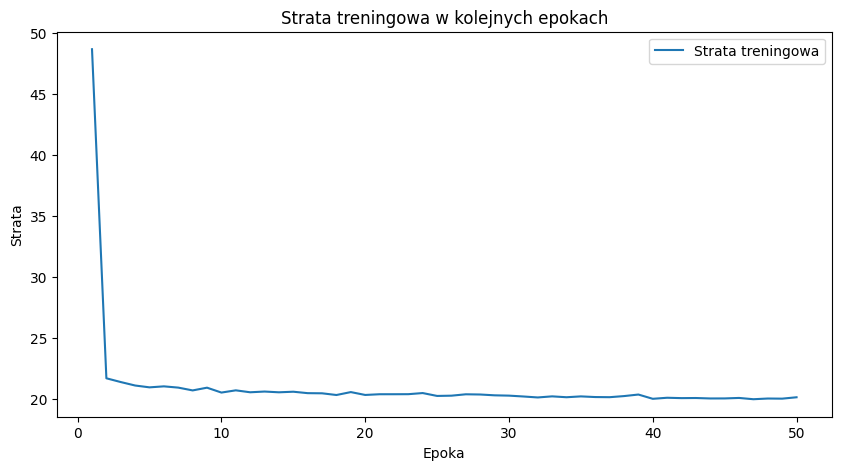

In [47]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the data for training
# Select the numeric columns and the target variable

graduates_data_copy = graduates_data.copy()
# graduates_data_copy = graduates_data_before.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy =graduates_data_copy.dropna(subset=columns_to_check)


features = graduates_data_copy[['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']]
target = graduates_data_copy['P_WWZ_P2']


# One-hot encode categorical variables
features = pd.get_dummies(features, columns=['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features.values, target, test_size=0.2, random_state=42
)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Define the deep neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)        # Second hidden layer
        self.fc3 = nn.Linear(64, 32)         # Third hidden layer
        self.fc4 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]
model_1 = RegressionModel(input_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression tasks

# Training loop
epochs = 50
batch_size = 32

train_losses = []

# Define optimizer with scheduler
optimizer = optim.Adam(model_1.parameters(), lr=0.001)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# # Training loop with validation
# for epoch in range(epochs):
#     model_1.train()
#     epoch_loss = 0.0
#     for i in range(0, X_train_tensor.size(0), batch_size):
#         batch_x = X_train_tensor[i:i+batch_size]
#         batch_y = y_train_tensor[i:i+batch_size]

#         optimizer.zero_grad()
#         outputs = model_1(batch_x)
#         loss = criterion(outputs, batch_y)
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()

#     # Step the scheduler
#     scheduler.step()

#     print(f"Epoch {epoch+1}/{epochs}, Training Loss: {epoch_loss:.4f}")
#     print(f"Current Learning Rate: {scheduler.optimizer.param_groups[0]['lr']}")

for epoch in range(epochs):
    model_1.train()
    permutation = torch.randperm(X_train_tensor.size(0))
    epoch_loss = 0.0

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model_1(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    train_losses.append(epoch_loss)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# Evaluate the model on the test set
model_1.eval()
with torch.no_grad():
    predictions = model_1(X_test_tensor).numpy()


test_predictions = predictions
y_test_actual = y_test_tensor.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")

# Visualize the predictions
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title("Rzeczywiste vs Przewidywane zarobki 2 lata po ukończeniu studiów")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
plt.show()

# Visualize the training and validation loss
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), train_losses, label='Strata treningowa')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa w kolejnych epokach")
plt.legend()
plt.show()

/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Training Loss: 0.2111, Validation Loss: 0.0977
Epoch 2/100, Training Loss: 0.1199, Validation Loss: 0.0860
Validation loss decreased from 0.0977 to 0.0860.
Epoch 3/100, Training Loss: 0.1067, Validation Loss: 0.0812
Validation loss decreased from 0.0860 to 0.0812.
Epoch 4/100, Training Loss: 0.0991, Validation Loss: 0.0729
Validation loss decreased from 0.0812 to 0.0729.
Epoch 5/100, Training Loss: 0.0940, Validation Loss: 0.0682
Validation loss decreased from 0.0729 to 0.0682.
Epoch 6/100, Training Loss: 0.0907, Validation Loss: 0.0736
EarlyStopping counter: 1 out of 5
Epoch 7/100, Training Loss: 0.0857, Validation Loss: 0.0675
Validation loss decreased from 0.0682 to 0.0675.
Epoch 8/100, Training Loss: 0.0833, Validation Loss: 0.0646
Validation loss decreased from 0.0675 to 0.0646.
Epoch 9/100, Training Loss: 0.0825, Validation Loss: 0.0711
EarlyStopping counter: 1 out of 5
Epoch 10/100, Training Loss: 0.0808, Validation Loss: 0.0653
EarlyStopping counter: 2 out of 5
Epo

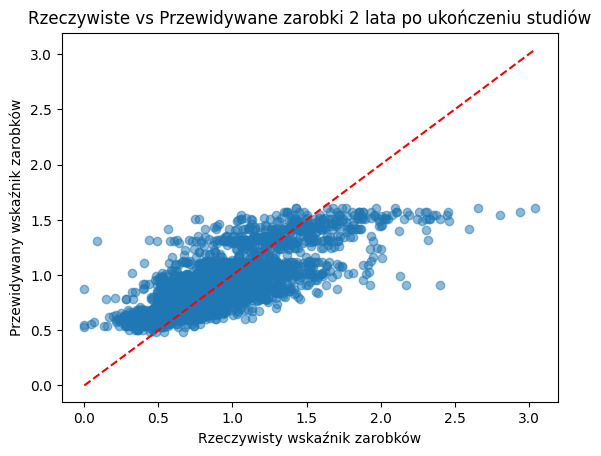

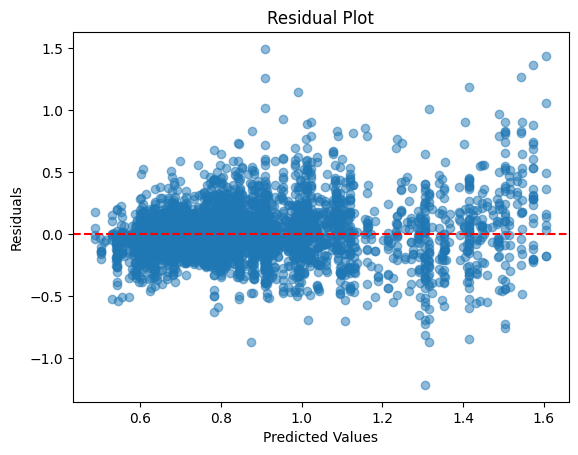

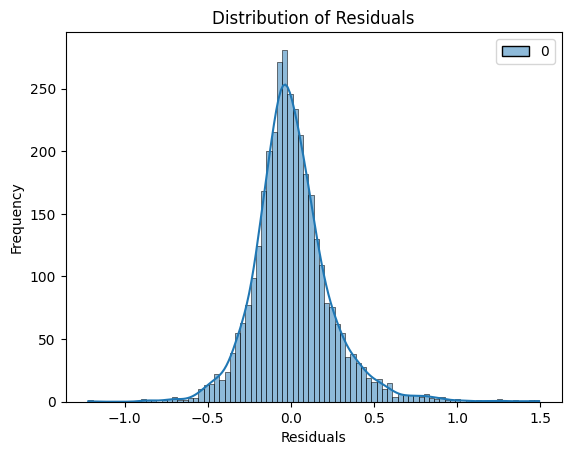

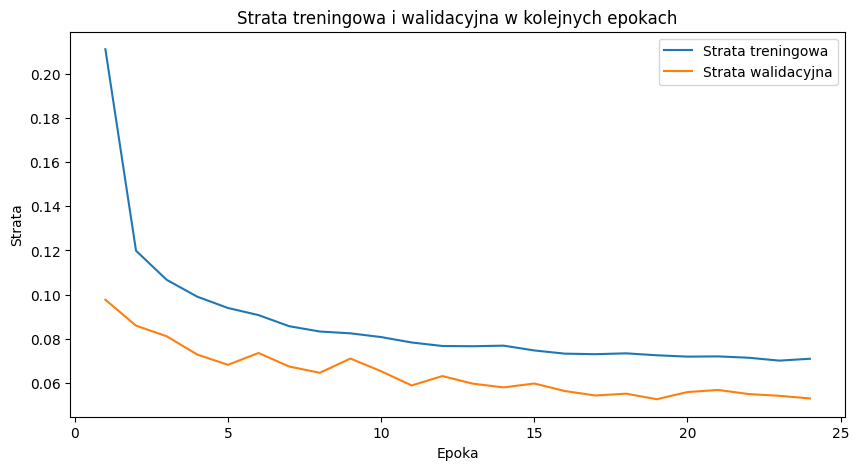

In [49]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

# Assuming 'graduates_data' is your DataFrame loaded from a CSV or other source
# Replace this with your actual data loading code
# graduates_data = pd.read_csv('your_data.csv')

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Drop rows with missing values in specified columns
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

# List of categorical features
categorical_features = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']

# Label Encoding for categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

# Features and target variable
features = graduates_data_copy[categorical_features]
target = graduates_data_copy['P_WWZ_P2']

# Convert to tensors
X = torch.tensor(features.values, dtype=torch.long)
y = torch.tensor(target.values, dtype=torch.float32).unsqueeze(1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

class GraduatesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


embedding_sizes = []
for col in categorical_features:
    num_categories = graduates_data_copy[col].nunique()
    embedding_dim = int(min(50, (num_categories + 1) // 2))
    embedding_sizes.append((num_categories, embedding_dim))

class RegressionModelWithEmbeddings(nn.Module):
    def __init__(self, embedding_sizes):
        super(RegressionModelWithEmbeddings, self).__init__()
        self.embeddings = nn.ModuleList(
            [nn.Embedding(categories, size) for categories, size in embedding_sizes]
        )
        total_embedding_size = sum([size for _, size in embedding_sizes])
        self.dropout = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm1d(total_embedding_size)
        self.fc1 = nn.Linear(total_embedding_size, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x_cat):
        x = [
            emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)
        ]  # List of embeddings
        x = torch.cat(x, dim=1)  # Concatenate embeddings
        x = self.bn1(x)
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn4(self.fc3(x)))
        x = self.fc4(x)
        return x
    
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss:
            if self.verbose and self.best_loss is not None:
                print(f"Validation loss decreased from {self.best_loss:.4f} to {val_loss:.4f}.")
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# Initialize the model
model = RegressionModelWithEmbeddings(embedding_sizes)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, verbose=True)

# Early stopping
early_stopping = EarlyStopping(patience=5, verbose=True)

# Create datasets
train_dataset = GraduatesDataset(X_train, y_train)
test_dataset = GraduatesDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

epochs = 100  # Increase epochs for better training
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch_x.size(0)
    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    epoch_valid_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            epoch_valid_loss += loss.item() * batch_x.size(0)
    epoch_valid_loss /= len(valid_loader.dataset)
    valid_losses.append(epoch_valid_loss)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Training Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_valid_loss:.4f}")

    # Step the scheduler
    scheduler.step(epoch_valid_loss)

    # Early stopping
    early_stopping(epoch_valid_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test).numpy()
    y_test_actual = y_test.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)
mape = mean_absolute_percentage_error(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title("Rzeczywiste vs Przewidywane zarobki 2 lata po ukończeniu studiów")
plt.plot(
    [y_test_actual.min(), y_test_actual.max()],
    [y_test_actual.min(), y_test_actual.max()],
    'r--'
)  # Line y=x
plt.show()

residuals = y_test_actual - test_predictions
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()



In [ ]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

# Assuming 'graduates_data' is your DataFrame loaded from a CSV or other source
# Replace this with your actual data loading code
# graduates_data = pd.read_csv('your_data.csv')

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Drop rows with missing values in specified columns
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

# List of categorical features
categorical_features = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']

# Label Encoding for categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

# Features and target variable
features = graduates_data_copy[categorical_features]
target = graduates_data_copy['P_WWZ_P2']

# Convert to tensors
X = torch.tensor(features.values, dtype=torch.long)
y = torch.tensor(target.values, dtype=torch.float32).unsqueeze(1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

class GraduatesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


embedding_sizes = []
for col in categorical_features:
    num_categories = graduates_data_copy[col].nunique()
    embedding_dim = int(min(50, (num_categories + 1) // 2))
    embedding_sizes.append((num_categories, embedding_dim))

# class RegressionModelWithEmbeddings(nn.Module):
#     def __init__(self, embedding_sizes):
#         super(RegressionModelWithEmbeddings, self).__init__()
#         self.embeddings = nn.ModuleList(
#             [nn.Embedding(categories, size) for categories, size in embedding_sizes]
#         )
#         total_embedding_size = sum([size for _, size in embedding_sizes])
#         self.dropout = nn.Dropout(0.5)
#         self.bn1 = nn.BatchNorm1d(total_embedding_size)
#         self.fc1 = nn.Linear(total_embedding_size, 128)
#         self.bn2 = nn.BatchNorm1d(128)
#         self.fc2 = nn.Linear(128, 64)
#         self.bn3 = nn.BatchNorm1d(64)
#         self.fc3 = nn.Linear(64, 32)
#         self.bn4 = nn.BatchNorm1d(32)
#         self.fc4 = nn.Linear(32, 1)

#     def forward(self, x_cat):
#         x = [
#             emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)
#         ]  # List of embeddings
#         x = torch.cat(x, dim=1)  # Concatenate embeddings
#         x = self.bn1(x)
#         x = self.dropout(x)
#         x = F.relu(self.bn2(self.fc1(x)))
#         x = self.dropout(x)
#         x = F.relu(self.bn3(self.fc2(x)))
#         x = self.dropout(x)
#         x = F.relu(self.bn4(self.fc3(x)))
#         x = self.fc4(x)
#         return x

# Define the deep neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)        # Second hidden layer
        self.fc3 = nn.Linear(64, 32)         # Third hidden layer
        self.fc4 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss:
            if self.verbose and self.best_loss is not None:
                print(f"Validation loss decreased from {self.best_loss:.4f} to {val_loss:.4f}.")
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# Initialize the model
# model = RegressionModelWithEmbeddings(embedding_sizes)
model = RegressionModel(input_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, verbose=True)

# Early stopping
early_stopping = EarlyStopping(patience=5, verbose=True)

# Create datasets
train_dataset = GraduatesDataset(X_train, y_train)
test_dataset = GraduatesDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

epochs = 100  # Increase epochs for better training
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch_x.size(0)
    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    epoch_valid_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            epoch_valid_loss += loss.item() * batch_x.size(0)
    epoch_valid_loss /= len(valid_loader.dataset)
    valid_losses.append(epoch_valid_loss)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Training Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_valid_loss:.4f}")

    # Step the scheduler
    scheduler.step(epoch_valid_loss)

    # Early stopping
    early_stopping(epoch_valid_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test).numpy()
    y_test_actual = y_test.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)
mape = mean_absolute_percentage_error(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title("Rzeczywiste vs Przewidywane zarobki 2 lata po ukończeniu studiów")
plt.plot(
    [y_test_actual.min(), y_test_actual.max()],
    [y_test_actual.min(), y_test_actual.max()],
    'r--'
)  # Line y=x
plt.show()

residuals = y_test_actual - test_predictions
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()



TypeError: RegressionModel.__init__() missing 1 required positional argument: 'input_dim'

In [50]:
from torchviz import make_dot

# Poprawiona próbka danych wejściowych
sample_input = torch.randn(1, input_dim)  # Jeden próbny przykład z odpowiednim wymiarem

# Wykonanie przejścia w modelu
sample_output = model(sample_input)

# Generowanie wizualizacji
dot = make_dot(sample_output, params=dict(model.named_parameters()))

# Dodanie atrybutów do poprawy czytelności
dot.attr(rankdir='TB', size="10,10", dpi="300")  # Zwiększenie rozdzielczości wykresu
dot.node_attr.update(fontsize='12')  # Zwiększenie rozmiaru czcionki


dot.render("model_architecture_test", format="png")  # Zapis jako PDF


RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Check for GPU availability
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# Define the predict_salary function
def predict_salary(model, input_features, scaler):
    """
    Predicts salary using the trained PyTorch model.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        input_features (list or dict): Input features in the order:
            ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']

    Returns:
        float: Predicted salary.
    """
    # Convert input features to a NumPy array if not already
    if isinstance(input_features, dict):
        input_values = [input_features[key] for key in input_features.keys()]
    else:
        input_values = input_features

    # Scale the input features
    input_values_scaled = scaler.transform([input_values])

    # Convert to PyTorch tensor and move to the same device as the model
    input_tensor = torch.tensor(input_values_scaled, dtype=torch.float32)

    # Make prediction
    model.eval()
    with torch.no_grad():
        predicted_salary = model(input_tensor).cpu().numpy()[0, 0]

    return predicted_salary


# Corrected example input (exclude 'P_ME_ZAR' because it's the target variable)
example_input = {

    'P_WOJ': 6, 
    'P_POZIOM': 1,  
    'P_FORMA': 0,  
    'Dziedzina': 3 
}

# Predict salary
predicted_salary = predict_salary(model_1, example_input, scaler)
print(f"Predicted salary: {predicted_salary:.4f} x Median Salary")


NameError: name 'model_1' is not defined

Epoch 1/50, Training Loss: 0.1994, Validation Loss: 0.1065
Epoch 2/50, Training Loss: 0.1110, Validation Loss: 0.0931
Epoch 3/50, Training Loss: 0.1008, Validation Loss: 0.0971
Epoch 4/50, Training Loss: 0.0917, Validation Loss: 0.0893
Epoch 5/50, Training Loss: 0.0890, Validation Loss: 0.0793
Epoch 6/50, Training Loss: 0.0867, Validation Loss: 0.0750
Epoch 7/50, Training Loss: 0.0846, Validation Loss: 0.0732
Epoch 8/50, Training Loss: 0.0839, Validation Loss: 0.0731
Epoch 9/50, Training Loss: 0.0813, Validation Loss: 0.0718
Epoch 10/50, Training Loss: 0.0813, Validation Loss: 0.0792
Epoch 11/50, Training Loss: 0.0820, Validation Loss: 0.0712
Epoch 12/50, Training Loss: 0.0798, Validation Loss: 0.0738
Epoch 13/50, Training Loss: 0.0803, Validation Loss: 0.0791
Epoch 14/50, Training Loss: 0.0796, Validation Loss: 0.0781
Epoch 15/50, Training Loss: 0.0794, Validation Loss: 0.0725
Epoch 16/50, Training Loss: 0.0776, Validation Loss: 0.0750
Epoch 17/50, Training Loss: 0.0770, Validation Lo

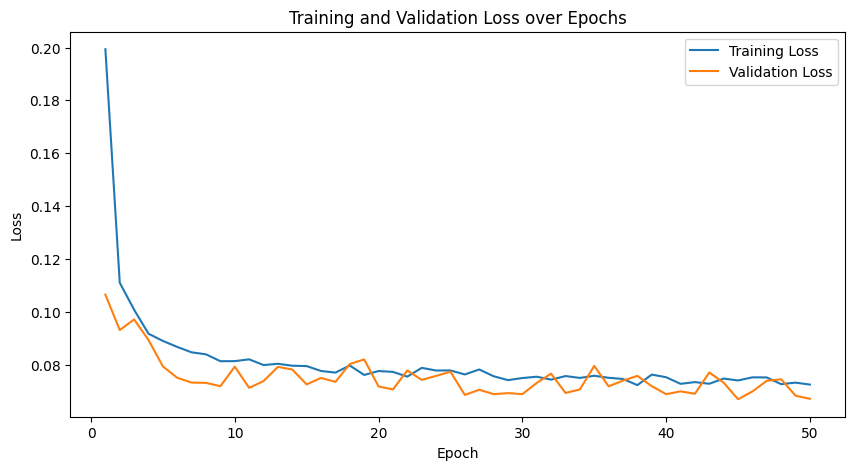

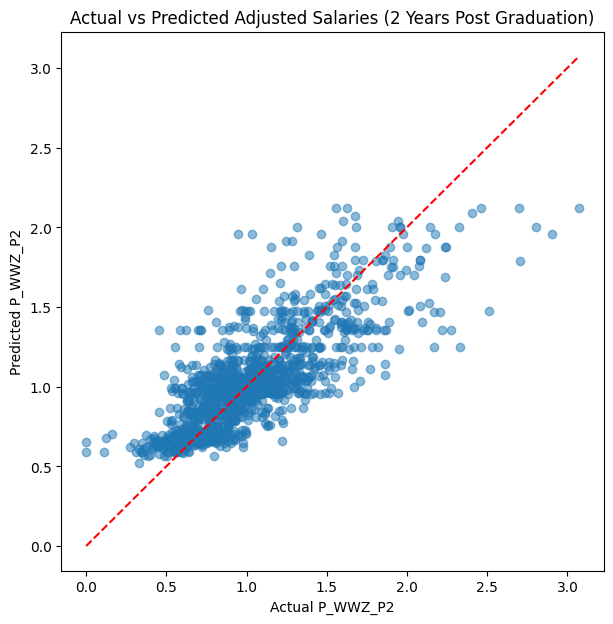

In [124]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Start with your given code
graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 4]
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

features = graduates_data_copy[['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']]
target = graduates_data_copy['P_WWZ_P2']

# One-hot encode categorical variables
features = pd.get_dummies(features, columns=['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina'])

# Convert DataFrame to numpy array
X = features.values
y = target.values

# Split the data into training, validation, and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1765, random_state=42
)  # 0.1765 * 0.85 ≈ 0.15

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
input_dim = X_train_tensor.shape[1]
model = RegressionModel(input_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with validation
epochs = 50
batch_size = 32
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))
    epoch_loss = 0.0

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = epoch_loss / (X_train_tensor.size(0) / batch_size)
    train_losses.append(avg_train_loss)

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss.item():.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor).numpy()
    y_test_actual = y_test_tensor.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")

# Visualize the training and validation loss
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()

# Visualize the predictions
plt.figure(figsize=(7,7))
plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Actual P_WWZ_P2")
plt.ylabel("Predicted P_WWZ_P2")
plt.title("Actual vs Predicted Adjusted Salaries (2 Years Post Graduation)")
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')  # Line y=x
plt.show()


In [10]:
def predict_salary(model, input_features, feature_columns):
    """
    Predicts salary using the trained PyTorch model.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        input_features (list or dict): Input features in the order:
            [ 'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
            The values should be the original categorical values (strings).
        feature_columns (list): List of feature column names used during training.

    Returns:
        float: Predicted adjusted salary (P_WWZ_P2).
    """
    import pandas as pd
    import torch

    # Create DataFrame from input_features
    if isinstance(input_features, dict):
        input_df = pd.DataFrame([input_features])
    elif isinstance(input_features, list):
        input_df = pd.DataFrame([input_features], columns=['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina'])
    else:
        raise ValueError("input_features must be a list or dict")

    # One-hot encode the input features
    input_df_encoded = pd.get_dummies(input_df, columns=['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina'])

    # Ensure all feature columns used in training are present
    for col in feature_columns:
        if col not in input_df_encoded.columns:
            input_df_encoded[col] = 0

    # Reorder columns to match training data
    input_df_encoded = input_df_encoded[feature_columns]

    # Ensure all data is of numerical type
    input_df_encoded = input_df_encoded.astype(float)

    # Convert to numpy array
    input_array = input_df_encoded.values

    # Convert to torch tensor
    input_tensor = torch.tensor(input_array, dtype=torch.float32)

    # Set model to evaluation mode
    model.eval()

    # Predict
    with torch.no_grad():
        prediction = model(input_tensor)

    # Return the prediction as float
    return prediction.item()

# After one-hot encoding
feature_columns = features.columns.tolist()

# Sample input features with original category labels
input_features = {
    'P_WOJ': 6,         # Original category label as a string
    'P_POZIOM': 1,        # Original category label as a string
    'P_FORMA': 0,         # Original category label as a string
    'Dziedzina': 3  # Original category label as a string
}

# Call the function
predicted_salary = predict_salary(model, input_features, feature_columns)

print(f"Predicted Salary: {predicted_salary:.4f} x Median")

RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)

Epoch 1/50, Training Loss: 1.3019, Validation Loss: 1.1465
Epoch 2/50, Training Loss: 0.3975, Validation Loss: 0.3031
Epoch 3/50, Training Loss: 0.3260, Validation Loss: 0.3257
Epoch 4/50, Training Loss: 0.2891, Validation Loss: 0.2934
Epoch 5/50, Training Loss: 0.2888, Validation Loss: 0.2607
Epoch 6/50, Training Loss: 0.2745, Validation Loss: 0.2590
Epoch 7/50, Training Loss: 0.2505, Validation Loss: 0.2512
Epoch 8/50, Training Loss: 0.2413, Validation Loss: 0.2462
Epoch 9/50, Training Loss: 0.2433, Validation Loss: 0.2360
Epoch 10/50, Training Loss: 0.2418, Validation Loss: 0.2466
Epoch 11/50, Training Loss: 0.2307, Validation Loss: 0.2364
Epoch 12/50, Training Loss: 0.2416, Validation Loss: 0.2552
Epoch 13/50, Training Loss: 0.2180, Validation Loss: 0.2242
Epoch 14/50, Training Loss: 0.2159, Validation Loss: 0.2408
Epoch 15/50, Training Loss: 0.2273, Validation Loss: 0.2386
Epoch 16/50, Training Loss: 0.2280, Validation Loss: 0.2256
Epoch 17/50, Training Loss: 0.2161, Validation Lo

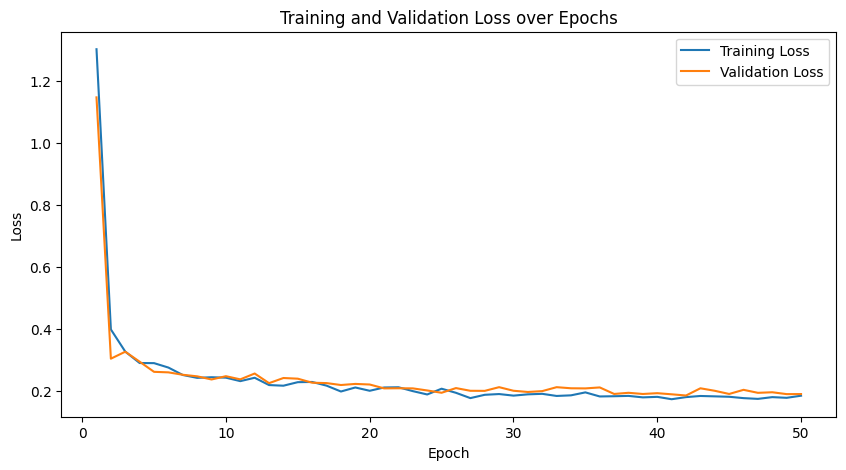

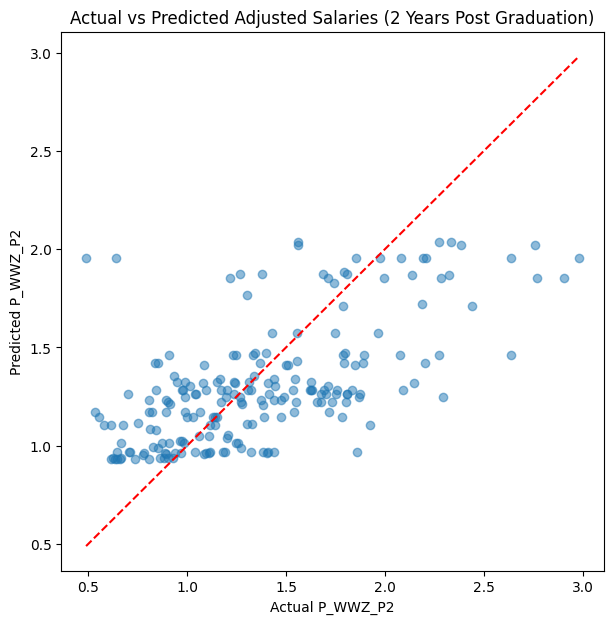

In [8]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Start with your given code
graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] == 3]
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

features = graduates_data_copy[['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']]
target = graduates_data_copy['P_WWZ_P2']

# One-hot encode categorical variables
features = pd.get_dummies(features, columns=['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina'])

# Convert DataFrame to numpy array
X = features.values
y = target.values

# Split the data into training, validation, and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1765, random_state=42
)  # 0.1765 * 0.85 ≈ 0.15

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
input_dim = X_train_tensor.shape[1]
model = RegressionModel(input_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with validation
epochs = 50
batch_size = 32
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))
    epoch_loss = 0.0

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = epoch_loss / (X_train_tensor.size(0) / batch_size)
    train_losses.append(avg_train_loss)

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss.item():.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor).numpy()
    y_test_actual = y_test_tensor.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")

# Visualize the training and validation loss
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()

# Visualize the predictions
plt.figure(figsize=(7,7))
plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Actual P_WWZ_P2")
plt.ylabel("Predicted P_WWZ_P2")
plt.title("Actual vs Predicted Adjusted Salaries (2 Years Post Graduation)")
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')  # Line y=x
plt.show()


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Start with your given code
graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 4]
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

# Map categorical variables to integer codes
for col in ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']:
    graduates_data_copy[col] = graduates_data_copy[col].astype('category').cat.codes

features = graduates_data_copy[['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']]
target = graduates_data_copy['P_WWZ_P2']

# Convert DataFrame to numpy array
X = features.values
y = target.values

# Split the data into training, validation, and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1765, random_state=42
)  # 0.1765 * 0.85 ≈ 0.15

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Get the number of unique categories for each categorical variable
num_categories = [graduates_data_copy[col].nunique() for col in ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']]

# Define embedding sizes for each categorical variable
embedding_sizes = [(n_categories, min(50, (n_categories + 1) // 2)) for n_categories in num_categories]

# Define the neural network model with embedding layers
class RegressionModel(nn.Module):
    def __init__(self, embedding_sizes):
        super(RegressionModel, self).__init__()
        self.embeddings = nn.ModuleList([
            nn.Embedding(categories, size) for categories, size in embedding_sizes
        ])
        total_embedding_size = sum([size for _, size in embedding_sizes])

        self.fc1 = nn.Linear(total_embedding_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.1)  # Adjusted dropout rate

    def forward(self, x):
        x = [emb(x[:, i]) for i, emb in enumerate(self.embeddings)]
        x = torch.cat(x, dim=1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
model = RegressionModel(embedding_sizes)

# Define the loss function and optimizer
criterion = nn.SmoothL1Loss()  # Using Huber loss
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

# Early stopping parameters
early_stop_patience = 10
best_val_loss = np.inf
epochs_no_improve = 0

# Training loop with validation and early stopping
epochs = 50  # Increased number of epochs
batch_size = 32  # Adjusted batch size
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))
    epoch_loss = 0.0

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * batch_x.size(0)

    # Calculate average training loss
    avg_train_loss = epoch_loss / X_train_tensor.size(0)
    train_losses.append(avg_train_loss)

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    # Learning rate scheduler step
    scheduler.step(val_loss)

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss.item():.4f}")

    # Early stopping
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stop_patience:
            print("Early stopping!")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pt'))

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor).numpy()
    y_test_actual = y_test_tensor.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")

# Visualize the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()

# Visualize the predictions
plt.figure(figsize=(7, 7))
plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Actual P_WWZ_P2")
plt.ylabel("Predicted P_WWZ_P2")
plt.title("Actual vs Predicted Adjusted Salaries (2 Years Post Graduation)")
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')  # Line y=x
plt.show()


/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50, Training Loss: 0.0774, Validation Loss: 0.0472
Epoch 2/50, Training Loss: 0.0433, Validation Loss: 0.0406
Epoch 3/50, Training Loss: 0.0399, Validation Loss: 0.0362
Epoch 4/50, Training Loss: 0.0376, Validation Loss: 0.0358
Epoch 5/50, Training Loss: 0.0368, Validation Loss: 0.0347
Epoch 6/50, Training Loss: 0.0365, Validation Loss: 0.0353
Epoch 7/50, Training Loss: 0.0358, Validation Loss: 0.0349
Epoch 8/50, Training Loss: 0.0359, Validation Loss: 0.0359
Epoch 9/50, Training Loss: 0.0354, Validation Loss: 0.0346
Epoch 10/50, Training Loss: 0.0352, Validation Loss: 0.0348
Epoch 11/50, Training Loss: 0.0343, Validation Loss: 0.0342
Epoch 12/50, Training Loss: 0.0343, Validation Loss: 0.0341
Epoch 13/50, Training Loss: 0.0348, Validation Loss: 0.0339
Epoch 14/50, Training Loss: 0.0346, Validation Loss: 0.0355
Epoch 15/50, Training Loss: 0.0344, Validation Loss: 0.0340
Epoch 16/50, Training Loss: 0.0337, Validation Loss: 0.0348
Epoch 17/50, Training Loss: 0.0336, Validation Lo

AttributeError: 'RegressionModel' object has no attribute 'torch'

/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50, Training Loss: 0.0957, Validation Loss: 0.0437
Epoch 2/50, Training Loss: 0.0417, Validation Loss: 0.0369
Epoch 3/50, Training Loss: 0.0404, Validation Loss: 0.0357
Epoch 4/50, Training Loss: 0.0374, Validation Loss: 0.0355
Epoch 5/50, Training Loss: 0.0380, Validation Loss: 0.0343
Epoch 6/50, Training Loss: 0.0369, Validation Loss: 0.0364
Epoch 7/50, Training Loss: 0.0366, Validation Loss: 0.0397
Epoch 8/50, Training Loss: 0.0369, Validation Loss: 0.0359
Epoch 9/50, Training Loss: 0.0348, Validation Loss: 0.0341
Epoch 10/50, Training Loss: 0.0354, Validation Loss: 0.0345
Epoch 11/50, Training Loss: 0.0350, Validation Loss: 0.0340
Epoch 12/50, Training Loss: 0.0351, Validation Loss: 0.0346
Epoch 13/50, Training Loss: 0.0345, Validation Loss: 0.0333
Epoch 14/50, Training Loss: 0.0345, Validation Loss: 0.0341
Epoch 15/50, Training Loss: 0.0343, Validation Loss: 0.0343
Epoch 16/50, Training Loss: 0.0338, Validation Loss: 0.0349
Epoch 17/50, Training Loss: 0.0338, Validation Lo

/tmp/ipykernel_81196/97166687.py:166: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pt'))


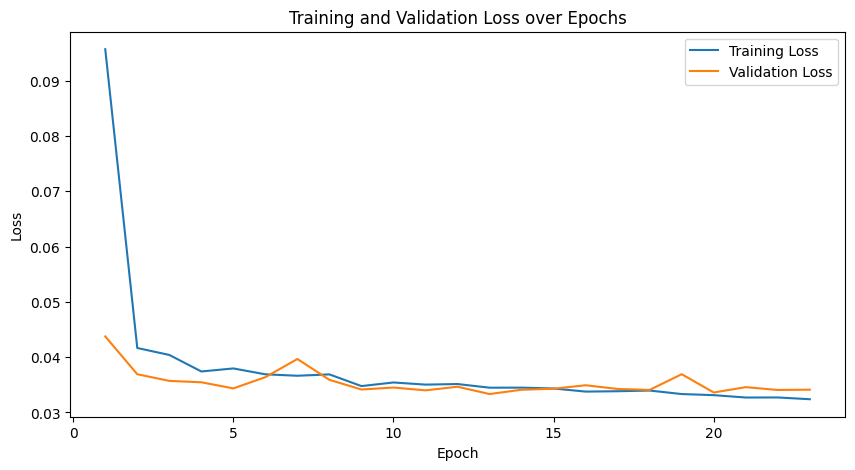

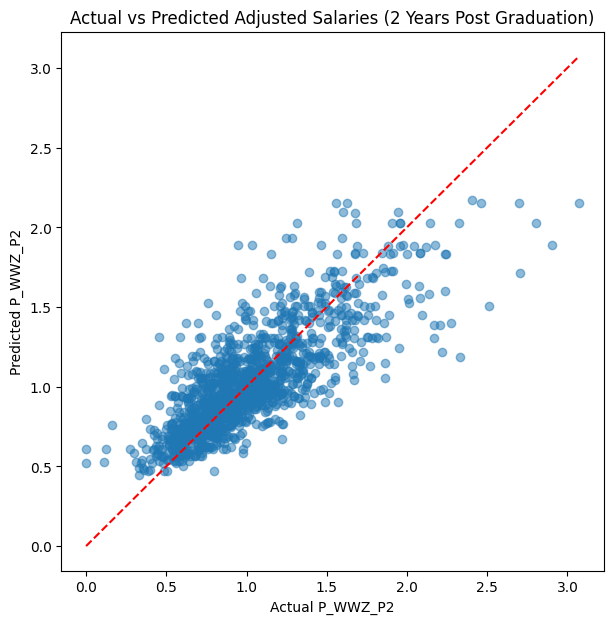

In [17]:
# --- Training Code ---

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Start with your given code
graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 4]
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

# Map categorical variables to integer codes and save mappings
category_mappings = {}
for col in ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']:
    graduates_data_copy[col] = graduates_data_copy[col].astype('category')
    codes = graduates_data_copy[col].cat.codes
    categories = graduates_data_copy[col].cat.categories
    mapping = dict(zip(categories, codes))
    reverse_mapping = dict(zip(codes, categories))
    graduates_data_copy[col] = codes
    category_mappings[col] = mapping

# Save category mappings
with open('category_mappings.pkl', 'wb') as f:
    pickle.dump(category_mappings, f)

features = graduates_data_copy[['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']]
target = graduates_data_copy['P_WWZ_P2']

# Convert DataFrame to numpy array
X = features.values
y = target.values

# Split the data into training, validation, and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1765, random_state=42
)  # 0.1765 * 0.85 ≈ 0.15

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Get the number of unique categories for each categorical variable
num_categories = [int(graduates_data_copy[col].nunique()) for col in ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']]

# Define embedding sizes for each categorical variable
embedding_sizes = [(n_categories, min(50, (n_categories + 1) // 2)) for n_categories in num_categories]

# Save embedding_sizes
with open('embedding_sizes.pkl', 'wb') as f:
    pickle.dump(embedding_sizes, f)

# Define the neural network model with embedding layers
class RegressionModel(nn.Module):
    def __init__(self, embedding_sizes):
        super(RegressionModel, self).__init__()
        self.embeddings = nn.ModuleList([
            nn.Embedding(num_categories, embedding_dim) for num_categories, embedding_dim in embedding_sizes
        ])
        total_embedding_size = sum([embedding_dim for _, embedding_dim in embedding_sizes])

        self.fc1 = nn.Linear(total_embedding_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.1)  # Adjusted dropout rate

    def forward(self, x):
        x = [emb(x[:, i]) for i, emb in enumerate(self.embeddings)]
        x = torch.cat(x, dim=1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
model = RegressionModel(embedding_sizes)

# Define the loss function and optimizer
criterion = nn.SmoothL1Loss()  # Using Huber loss
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

# Early stopping parameters
early_stop_patience = 10
best_val_loss = np.inf
epochs_no_improve = 0

# Training loop with validation and early stopping
epochs = 50  # Adjust number of epochs as needed
batch_size = 32  # Adjust batch size as needed
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))
    epoch_loss = 0.0

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * batch_x.size(0)

    # Calculate average training loss
    avg_train_loss = epoch_loss / X_train_tensor.size(0)
    train_losses.append(avg_train_loss)

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    # Learning rate scheduler step
    scheduler.step(val_loss)

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss.item():.4f}")

    # Early stopping
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        epochs_no_improve = 0
        # Save the best model's state dictionary
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stop_patience:
            print("Early stopping!")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pt'))

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor).numpy()
    y_test_actual = y_test_tensor.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")

# Visualize the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()

# Visualize the predictions
plt.figure(figsize=(7, 7))
plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Actual P_WWZ_P2")
plt.ylabel("Predicted P_WWZ_P2")
plt.title("Actual vs Predicted Adjusted Salaries (2 Years Post Graduation)")
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')  # Line y=x
plt.show()
